# Защита персональных данных клиентов
Необходимо защитить данные клиентов страховой компании «Хоть потоп»: разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.
+ обосновать корректность его работы,
+ сделать это так чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

Подбирать наилучшую модель не будем. Работаем только с линейной регрессией.

# План проекта

**Загрузка и подготовка данных:**
* Импорт библиотек;
* Получение общей информации (head, info, describe);
* Чтение датасета, поиск пустых значений, удаление дубликатов;
* Изучение коррелляции данных;
* Разделение датасета на признаки и целевой признак;

**Анализ данных:**
* Визуализация данных;
* Портрет клиента.

**Умножение матриц:**
* Алгоритм преобразования;
* Проверка алгоритма.

**Итоги работы**

## Загрузка и подготовка данных

In [1]:
import numpy as np
from numpy import linalg as LA

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/insurance.csv')
display(data.head(3))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0


In [3]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data[['Возраст', 'Зарплата']] = data[['Возраст', 'Зарплата']].astype(int)
#data.info()

In [6]:
display(data.duplicated().sum())

153

In [7]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [8]:
data_0 = data.drop(['Пол'], axis=1)
data_0.corr(method ='spearman')

,Возраст,Зарплата,Члены семьи,Страховые выплаты
Возраст,1.000000,-0.020238,-0.001503,0.548589
Зарплата,-0.020238,1.000000,-0.025492,-0.005549
Члены семьи,-0.001503,-0.025492,1.000000,-0.029210
Страховые выплаты,0.548589,-0.005549,-0.029210,1.000000


Определяем признаики и целевой признак:


In [9]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

train, valid = train_test_split(data, test_size=0.25, random_state=12345)

features_train = train.drop(['Страховые выплаты'], axis=1)
target_train = train['Страховые выплаты']

features_valid = valid.drop(['Страховые выплаты'], axis=1)
target_valid = valid['Страховые выплаты']


display(features_train.shape)
display(features_valid.shape)

(3750, 4)

(1250, 4)

### Итог подготовки данных:
1. Загрузила данные - 5 столбцов, 5000 строк.
2. Перевела тип данных по зарплате и возрасту в целые числа.
3. Пропусков в датасете нет.
4. Есть 153 дубликата. Решаю оставить. Возможно это случайные совпадения.
5. Посмотрела на клиентов через .describe() и .corr(): страховые выплаты зависят от возраста. Наши клиенты - люди среднего возраста, со сред.доходом 40 000, не семейные.
6. Поделила выборку на обучение и проверку.

## Анализ данных

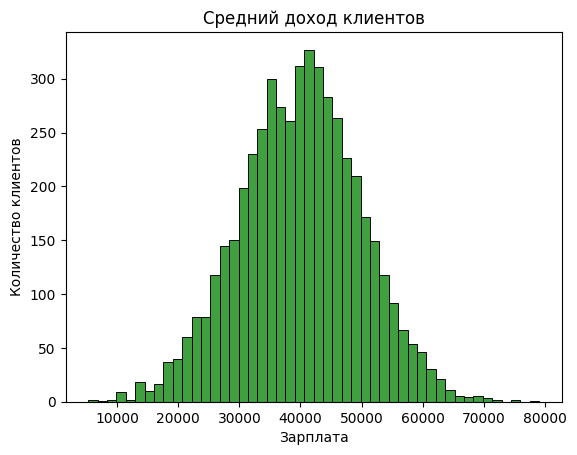

,Зарплата
Пол,
0,39769.061876
1,40064.247295


In [10]:
sns.histplot(data[f'Зарплата'], color='green')
plt.title('Средний доход клиентов')
plt.xlabel('Зарплата')
plt.ylabel('Количество клиентов')
plt.show()

many_mean = data.pivot_table(index='Пол', values='Зарплата', aggfunc = 'mean')
display(many_mean)

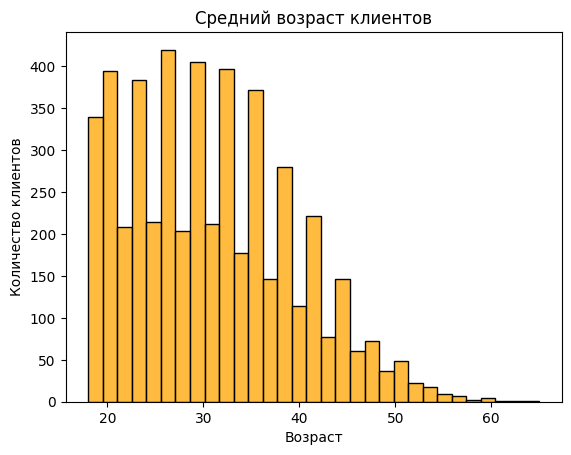

,Возраст
Пол,
0,30.935329
1,30.970341


In [11]:
sns.histplot(data[f'Возраст'], color='orange')
plt.title('Средний возраст клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

old_mean = data.pivot_table(index='Пол', values='Возраст', aggfunc = 'mean')
display(old_mean)

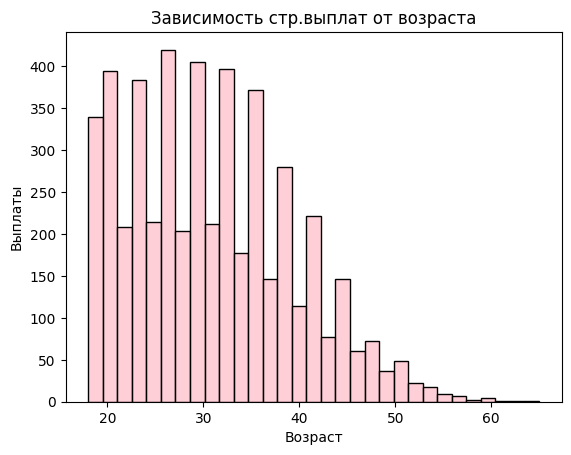

,Возраст
Страховые выплаты,
0,128514
1,18911
2,5849
3,1005
4,420
5,65


In [12]:
sns.histplot(data_0[f'Возраст'], color='pink')
plt.title('Зависимость стр.выплат от возраста')
plt.xlabel('Возраст')
plt.ylabel('Выплаты')
plt.show()

old_mean = data_0.pivot_table(index='Страховые выплаты', values='Возраст', aggfunc = 'sum')
display(old_mean)

### Краткий анализ данных:
Посмотрела кто наши клиенты.
- средний доход у обоих полов примерно одинаковый - 40 000.
- средний возраст тоже. Похоже, страхование после 30 лет начинает интересовать население.
- страховыми выплатами чаще пользуются клиенты среднего возраста 20-35 лет. С 40 лет выплаты заметно снижаются.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**
НЕ ИЗМЕНИТСЯ. Качество лин.регрессии останется прежней, если к ней добавить произвольную обратимую матрицу.

**Обоснование:**
1. где а - предсказания,
Х - матрица признаков,
w - вектор весов
$$a = Xw$$

2. раскроем w
$$X * (X^T * X)^{-1}  * X^T * y$$

3. сравним выражение с выражением, в которое добавляем произвольную обратимую матрицу P
$$X * (X^T * X)^{-1}  * X^T * y = X * P * ((X * P)^T * (X * P))^{-1}  * (X * P)^T * y$$

4. раскроем скорбки
$$X * (X^T * X)^{-1}  * X^T * y = X *Р *(Р^T *Х^T *Х *Р)^{-1}* P^T *X^T * y$$

5. сократим уравнение за счет обратных матриц:
$$P * P^{-1}=Е$$
$$P^T * (P^T)^{-1}=Е$$


6. преобразуем формулу:
$$X * (X^T * X)^{-1}  * X^T * y = X * (X^T * X)^{-1}  * X^T * y$$

7. обозначим w слева и справа:
$$𝑋𝑤=Х𝑤$$

8. то есть
$$a = a'$$


## Алгоритм преобразования

**Алгоритм**

1. Cоздали матрицу со случайными числами размером 4*4
2. Проверим, что она обратимая.
3. Умножим матрицу на признаки обучающей и тестовой выборки.
4. Обучение линейной регрессии на исходных и на зашифрованных данных.
5. Сравнение получившихся метрик R2.

 **Обоснование**

$$X * P * ((X * P)^T * (X * P))^{-1}  * (X * P)^T *y$$

## Проверка алгоритма

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

1. Создаем матрицу со случайными числами.

In [13]:
P = np.random.normal(size=(4, 4))
print(P)

[[-1.50092378  0.65396259 -0.32368831 -0.12758836]
 [-0.07347216  1.40394468 -1.37149115 -0.23453283]
 [ 1.24115932 -0.46614192  0.33914283  1.24432728]
 [-0.68703028  0.78216332  0.978496   -1.1522478 ]]


In [14]:
P_inv = LA.inv(P)
print(P_inv)

print()
print('Подтвердилось! Матрица обратимая - по средней диагонали единицы!')
print(np.dot(P, P_inv))

[[-0.65458523  0.26819879  0.09918335  0.12500139]
 [ 0.24610354  0.49772574  0.6362384   0.55852206]
 [ 0.16737642 -0.23089737  0.50840746  0.57749991]
 [ 0.69949381 -0.0181298   0.80449277 -0.07285145]]

Подтвердилось! Матрица обратимая - по средней диагонали единицы!
[[ 1.00000000e+00  1.89664229e-17 -1.73299058e-17 -1.85040966e-18]
 [-3.62939615e-18  1.00000000e+00  9.23703563e-17 -1.17590351e-16]
 [ 3.18068205e-17 -6.39624979e-17  1.00000000e+00 -1.11708647e-17]
 [ 1.00567248e-16  3.07643239e-17  2.43445833e-16  1.00000000e+00]]


3. Найдем метрику R2 без шифрования данных.

In [15]:
class LinearRegression:
    def fit(self, features_train, target_train):
        X = np.concatenate([np.ones((features_train.shape[0],1)), features_train], axis=1)
        y = target_train
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, features_valid):
        return features_valid @ self.w + self.w0

model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
r2 = r2_score(target_valid, predictions)
print('Без шифрования метрика R2 равна:', r2)

Без шифрования метрика R2 равна: 0.43522756840833376


4. Найдем метрику R2 с шифрованием данных.

In [16]:
features_train_P = features_train @ P
features_valid_P = features_valid @ P
#print(features_valid_P.head(3))
#print(features_train_P.head(3))

model_P = LinearRegression()
model_P.fit(features_train_P, target_train)
predictions = model_P.predict(features_valid_P)
r2 = r2_score(target_valid, predictions)
print('С шифрованием метрика R2 равна:', r2)

С шифрованием метрика R2 равна: 0.4352275622866336


## Итоги работы:
1. Получены данные от страховой компании, которые необходимо защитить шифрованием. В них нет пропусков и дубликатов: производить манипуляции по подготовке данных не понадобилось. Что сохранило время работы над проектом. Сразу разделила выборку на обучающую и тестовую.
2. При детальном изучении данных мы нашли наших клиентов: это люди после 30 со средним достатком 40 000 рублей, холостые. Страховые выплаты популярны у клиентов среднего возраста 20-35 лет. Портрет клиента может понадобится для дальнейшего разработка услуг.
3. По работе с матрицами проверила теорию, что данные не изменяться при шифровании данных на рандомную матрицу.
4. Составила алгоритм преобразования и проработала его:
- создала матрицу и проверила, что она обратимая,
- создала класс лин.регресии с фунциями обучения и предсказания,
- обучила по ним данные без шифрования, чтобы узнать метрику R2,
- умножила рандомную таблицу на данные тестовой и обучающей выборки, применила к ней обучения и предсказаний, чтобы узнать метрику R2 на зашифрованных данных.
5. Без шифрования метрика R2 равна: 0.4352275684083339. С шифрованием метрика R2 равна: 0.435227570267549. Можно сказать, что данные одинаковы. То есть качество обучения после шифрования данных осталось на прежнем уровне.
6. Данное шифрование можно использовать в работе.